## Flowers classifier on Imagenet trained Mobilenet

#### We are going to use a model trained on the ImageNet Large Visual Recognition Challenge dataset. These models can differentiate between 1,000 different classes, like Dalmatian or dishwasher. You will have a choice of model architectures, so you can determine the right tradeoff between speed, size and accuracy for your problem.

https://codelabs.developers.google.com/codelabs/tensorflow-for-poets/#0

In [2]:
!mkdir tf_files
!curl http://download.tensorflow.org/example_images/flower_photos.tgz \
    | tar xz -C tf_files

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218M  100  218M    0     0  18.0M      0  0:00:12  0:00:12 --:--:-- 16.8M


In [3]:
!ls tf_files/flower_photos

LICENSE.txt daisy       dandelion   roses       sunflowers  tulips


In [17]:
from __future__ import print_function
from io import BytesIO
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL.Image
from IPython.display import clear_output, Image, display, HTML
import tensorflow as tf

#### Configure your MobileNet
In this exercise, we will retrain a MobileNet. MobileNet is a a small efficient convolutional neural network. "Convolutional" just means that the same calculations are performed at each location in the image.

The MobileNet is configurable in two ways:

Input image resolution: 128,160,192, or 224px. Unsurprisingly, feeding in a higher resolution image takes more processing time, but results in better classification accuracy.
The relative size of the model as a fraction of the largest MobileNet: 1.0, 0.75, 0.50, or 0.25.
We will use 224 0.5 for this codelab.

Get retrain.py in the same location as your dataset dir from https://github.com/tensorflow/hub/blob/master/examples/image_retraining/retrain.py

Set these variables from command line to run retraining:

IMAGE_SIZE=224
ARCHITECTURE="mobilenet_0.50_${IMAGE_SIZE}"

### training
``` python retrain.py \
  --bottleneck_dir=tf_files/bottlenecks \
  --how_many_training_steps=500 \
  --model_dir=tf_files/models/ \
  --summaries_dir=tf_files/training_summaries/"${ARCHITECTURE}" \
  --output_graph=tf_files/retrained_graph.pb \
  --output_labels=tf_files/retrained_labels.txt \
  --architecture="${ARCHITECTURE}" \
  --image_dir=tf_files/flower_photos```

### Helper functions


In [18]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 1)*255)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    
def image_plots(imgs, figsize=(12,8), rows=1, interp=False, titles=None):
    """
    Function to plot images from `imgs` array with optional labels from `titles`.
    Images will be plot in one figure with number of `rows`. 
    """
    f = plt.figure(figsize=figsize)
    cols = len(imgs)//rows if len(imgs) % 2 == 0 else len(imgs)//rows + 1
    for i in range(len(imgs)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(imgs[i], interpolation=None if interp else 'none')    

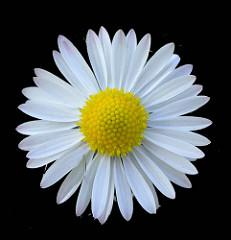

(240, 231, 3)


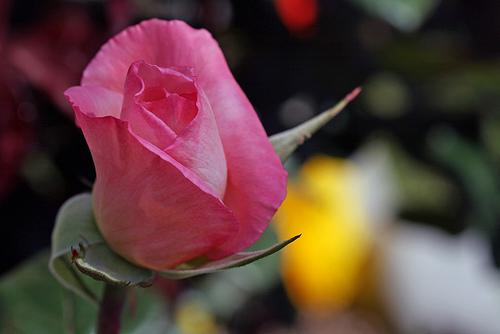

In [28]:
## show validation samples
    
img0 = PIL.Image.open('tf_files/flower_photos/daisy/21652746_cc379e0eea_m.jpg')
img0 = np.float32(img0)
showarray(img0/255.0)
print(img0.shape)

    
img1 = PIL.Image.open('tf_files/flower_photos/roses/2414954629_3708a1a04d.jpg')
img1 = np.float32(img1)
showarray(img1/255.0)

### validation

````python label_image.py \
    --graph=tf_files/retrained_graph.pb  \
    --image=tf_files/flower_photos/daisy/21652746_cc379e0eea_m.jpg \
    --input_layer=Placeholder \
    --output_layer=final_result \
    --labels=tf_files/retrained_labels.txt````
    
```` daisy 0.9765855
sunflowers 0.016352998
dandelion 0.0039819875
tulips 0.0025964768
roses 0.00048298057 ```` 


````python label_image.py \
    --graph=tf_files/retrained_graph.pb  \
    --image=tf_files/flower_photos/roses/2414954629_3708a1a04d.jpg \
    --input_layer=Placeholder \
    --output_layer=final_result \
    --labels=tf_files/retrained_labels.txt````
    
```` roses 0.8682645
tulips 0.09463594
dandelion 0.019823283
sunflowers 0.014929837
daisy 0.002346477 ````    